In [4]:
import pandas as pd
import matplotlib as mpl

In [5]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')

In [23]:
data = pd.read_csv('amazon.csv', encoding='iso-8859-1', thousands = '.' )

In [10]:
import chardet

In [11]:
with open("amazon.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [24]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [25]:
data.shape

(6454, 5)

In [26]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2005-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [27]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [28]:
import numpy as np
data1 = data.replace(0, np.nan)

In [29]:
data1

,year,state,month,number,date
0,1998,Acre,Janeiro,NaN,1998-01-01
1,1999,Acre,Janeiro,NaN,1999-01-01
2,2000,Acre,Janeiro,NaN,2000-01-01
3,2001,Acre,Janeiro,NaN,2001-01-01
4,2002,Acre,Janeiro,NaN,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [33]:
data2 = data1.dropna()

In [35]:
data2

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [36]:
data2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [39]:
data2['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [49]:
data2['month'].replace({'Janeiro':"January", 
                       "Fevereiro":'February',
                       "Marco": "March",
                       "Abril":'April',
                       "Maio":'May',
                       "Junho":"June",
                       "Julho":"July",
                       "Agosto":"August",
                       "Setembro":"September",
                       "Outubro":"October",
                       "Novembro":"November",
                       "Dezembro":"December"}, 
                       value=None,
                      inplace=True)

C:\Users\Soumya2.Gupta\Desktop\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [50]:
data2

,year,state,month,number,date
5,2003,Acre,January,10.0,2003-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
12,2010,Acre,January,1.0,2010-01-01
17,2015,Acre,January,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


In [51]:
monthly_fires = data2.groupby('month')['number'].sum()

In [52]:
months_unique=list(data2.month.unique())

In [53]:
months_unique

['January',
 'February',
 'Março',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [54]:
monthly_fires = monthly_fires.reindex(months_unique,axis=0)

In [58]:
monthly = monthly_fires.to_frame()

In [59]:
monthly.reset_index(level=0, inplace=True)

In [60]:
monthly

,month,number
0,January,52587.0
1,February,30952.0
2,Março,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


In [67]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

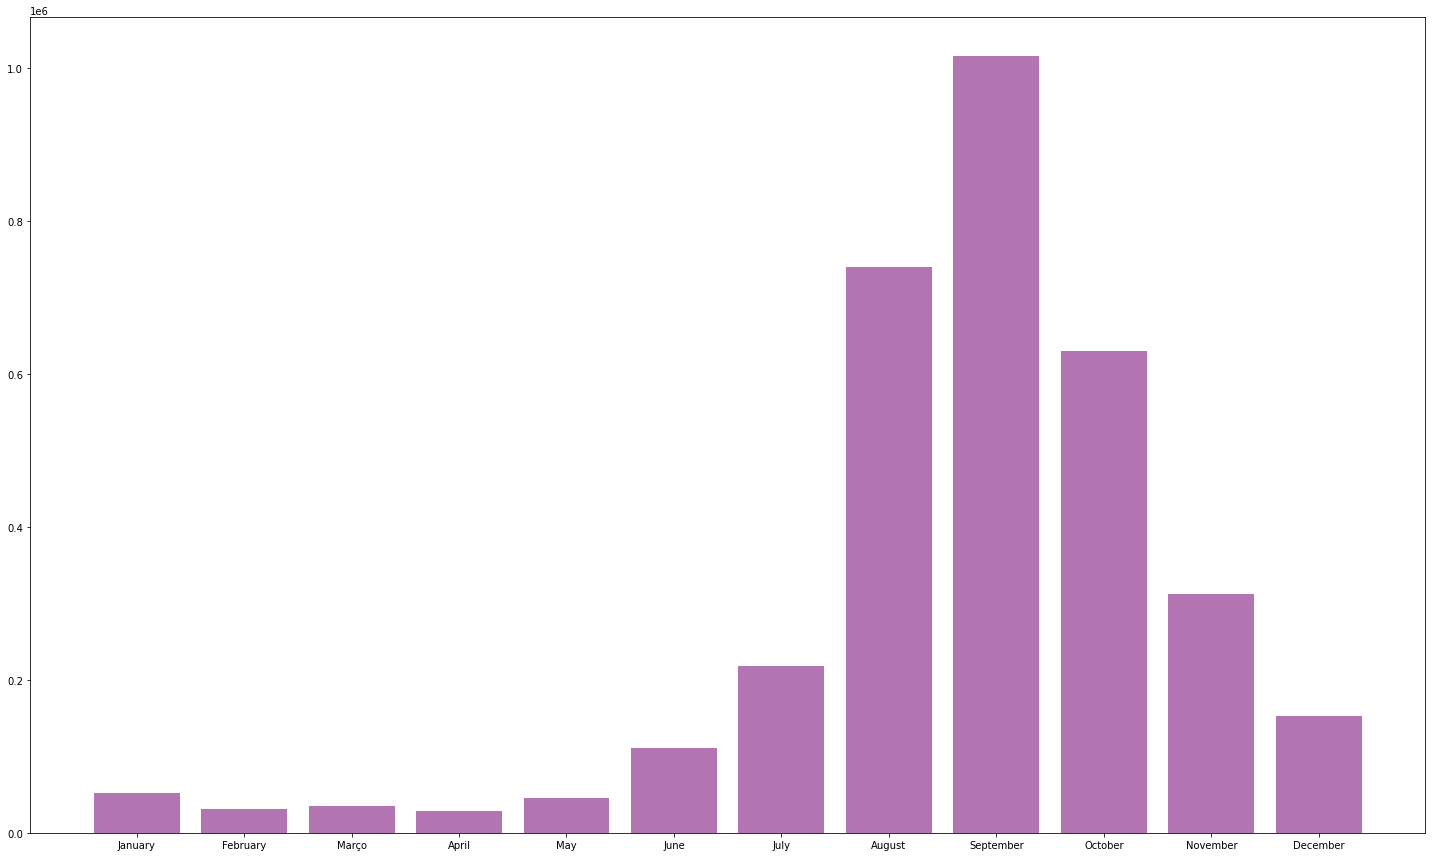

In [69]:
plt.figure(figsize = (25,15))

plt.bar(
monthly['month'], 
monthly['number'],
color = (0.5, 0.1, 0.5, 0.6))